In [29]:
import numpy as np
import matplotlib.pyplot as plt

from parabolic_2d import SinSinExpPDEData

from scipy.sparse import diags, csr_matrix, spdiags
from scipy.sparse.linalg import spsolve

from fealpy.mesh.uniform_mesh_2d import UniformMesh2d

In [30]:
pde = SinSinExpPDEData()

# 空间离散
domain = pde.domain()
nx = 10
ny = 10
hx = (domain[1] - domain[0])/nx
hy = (domain[3] - domain[2])/ny
mesh = UniformMesh2d([0, nx, 0, ny], h=(hx, hy), origin=(domain[0], domain[2]))

# 时间离散
duration = pde.duration()
nt = 640
tau = (duration[1] - duration[0])/nt 

# 计算网比
rx = tau / hx ** 2
ry = tau / hy ** 2
r = rx + ry
print("r:", r)

#初值
uh0 = mesh.interpolate(pde.init_solution, intertype='node')

r: 0.31249999999999994


In [31]:
errors = []

def advance_backward(n):
    """
    @brief 时间步进格式为向后欧拉方法

    @param[in] n int, 表示第 n 个时间步（当前时间步） 
    """
    t = duration[0] + n*tau

    if n == 0:
        return uh0, t
    else:
        rx = tau/mesh.h[0]**2 
        ry = tau/mesh.h[1]**2 

        if rx + ry > 0.5:
            raise ValueError(f"The rx+ry: {rx + ry} should be smaller than 0.5")

        NN = mesh.number_of_nodes()
        n0 = mesh.nx + 1
        n1 = mesh.ny + 1
        k = np.arange(NN).reshape(n0, n1)

        A = diags([1+2*rx+2*ry], 0, shape=(NN, NN), format='csr')

        val = np.broadcast_to(-rx, (NN-n1, ))
        I = k[1:, :].flat
        J = k[0:-1, :].flat
        A += csr_matrix((val, (I, J)), shape=(NN, NN), dtype=mesh.ftype)
        A += csr_matrix((val, (J, I)), shape=(NN, NN), dtype=mesh.ftype)

        val = np.broadcast_to(-ry, (NN-n0, ))
        I = k[:, 1:].flat
        J = k[:, 0:-1].flat
        A += csr_matrix((val, (I, J)), shape=(NN, NN), dtype=mesh.ftype)
        A += csr_matrix((val, (J, I)), shape=(NN, NN), dtype=mesh.ftype)

        source = lambda p: pde.source(p, t + tau)

        node = mesh.entity('node')
        f = source(node).reshape(-1)
        f *= tau
        f += uh0.flat

        gD = lambda p: pde.dirichlet(p, t + tau)

        uh = mesh.function('node').reshape(-1)
        f = f.reshape(-1)
        isBdNode = mesh.ds.boundary_node_flag().reshape(-1)
        uh[isBdNode] = gD(node[isBdNode])

        f -= A @ uh
        f[isBdNode] = uh[isBdNode]

        bdIdx = np.zeros(A.shape[0], dtype=np.int_)
        bdIdx[isBdNode] = 1
        D0 = spdiags(1-bdIdx, 0, A.shape[0], A.shape[0])
        D1 = spdiags(bdIdx, 0, A.shape[0], A.shape[0])
        A = D0@A@D0 + D1

        uh0.flat = spsolve(A, f)

        solution = lambda p: pde.solution(p, t + tau)
        
        node = mesh.node
        uI = solution(node)
        e = uI - uh0
        emax = np.max(np.abs(e))
        errors.append(emax)

        return uh0, t

frame=00000, time=0.00000000
frame=00000, time=0.00000000
node: (121, 2)
f: (121,)
f: (121,)
uh0: (11, 11)
uh: (121,)
isBdNode: (121,)
frame=00001, time=0.00156250
node: (121, 2)
f: (121,)
f: (121,)
uh0: (11, 11)
uh: (121,)
isBdNode: (121,)
frame=00002, time=0.00312500
node: (121, 2)
f: (121,)
f: (121,)
uh0: (11, 11)
uh: (121,)
isBdNode: (121,)
frame=00003, time=0.00468750
node: (121, 2)
f: (121,)
f: (121,)
uh0: (11, 11)
uh: (121,)
isBdNode: (121,)
frame=00004, time=0.00625000
node: (121, 2)
f: (121,)
f: (121,)
uh0: (11, 11)
uh: (121,)
isBdNode: (121,)
frame=00005, time=0.00781250
node: (121, 2)
f: (121,)
f: (121,)
uh0: (11, 11)
uh: (121,)
isBdNode: (121,)
frame=00006, time=0.00937500
node: (121, 2)
f: (121,)
f: (121,)
uh0: (11, 11)
uh: (121,)
isBdNode: (121,)
frame=00007, time=0.01093750
node: (121, 2)
f: (121,)
f: (121,)
uh0: (11, 11)
uh: (121,)
isBdNode: (121,)
frame=00008, time=0.01250000
node: (121, 2)
f: (121,)
f: (121,)
uh0: (11, 11)
uh: (121,)
isBdNode: (121,)
frame=00009, time

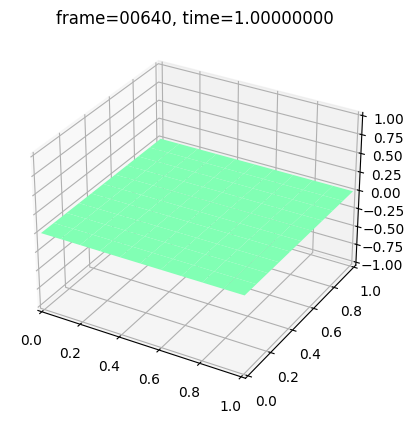

errors: [0.010238279133438888, 0.029459506121816026, 0.047919464461337546, 0.06564261343364908, 0.08265266812125516, 0.09897262167449095, 0.11462476691583268, 0.12963071730123477, 0.14401142725759464, 0.15778721191487843, 0.17097776625089545, 0.18360218366616465, 0.1956789740058109, 0.20722608104491824, 0.2182608994532813, 0.22880029125502166, 0.23886060179808166, 0.2484576752481542, 0.25760686962118384, 0.26632307136814437, 0.27462070952540607, 0.2825137694435902, 0.2900158061074467, 0.29713995705890284, 0.30389895493507635, 0.31030513963269923, 0.3163704701100506, 0.32210653583717574, 0.3275245679048412, 0.3326354498023717, 0.33744972787420885, 0.3419776214647423, 0.3462290327606784, 0.3502135563399375, 0.3539404884358032, 0.35741883592478924, 0.3606573250464364, 0.363664409863009, 0.36644828046682454, 0.3690168709427178, 0.37137786709292164, 0.3735387139314287, 0.3755066229546846, 0.3772885791952687, 0.3788913480650116, 0.3803214819938127, 0.38158532687023267, 0.3826890282897566, 0.

In [32]:
# 绘制结果
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
box = [0, 1, 0, 1, -1, 1] # 图像显示的范围 0 <= x <= 1, 0 <= y <= 1, -1 <= uh <= 1
mesh.show_animation(fig, axes, box, advance_backward, 
                    fname='parabolic_2d_ab.mp4', plot_type='surface', frames=nt + 1)
plt.show()

print("errors:", errors)